In [242]:
import math 
from scipy.stats import norm
from scipy import stats as st
from scipy.stats import t
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
df = pd.read_csv('/Users/yanaprynik/Work_doc/ab_data.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

user_a = df[df['group'] == 'A']
user_b = df[df['group'] == 'B']

list_a = []
list_b = []
for i in user_a['user_id']:
    list_a.append(i)
for i in user_b['user_id']:
    list_b.append(i)

result=list(set(list_a) & set(list_b))
df = df[~df['user_id'].isin(result)]

df_piv = df.groupby(['date','group']).agg({
    'user_id': 'count', 
    'price': 'sum', 
    'purchase':'sum'}).reset_index()

df_piv['conversion'] = df_piv['purchase'] / df_piv['user_id'] * 100
df_piv['avg_price'] = df_piv['price'] / df_piv['purchase']

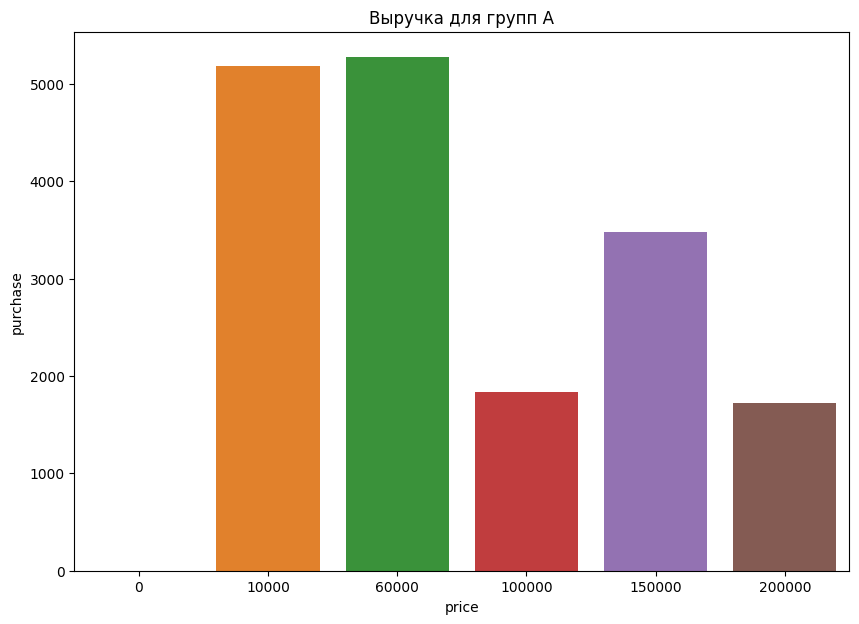

In [244]:
user_a = user_a[~user_a['user_id'].isin(result)]
price_group_a = user_a.groupby(['price']).agg({'user_id': 'count', 'purchase': 'sum'})

fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=price_group_a,
    x = price_group_a.index,
    y= 'purchase'
)
barplot.set_title('Выручка для групп А');

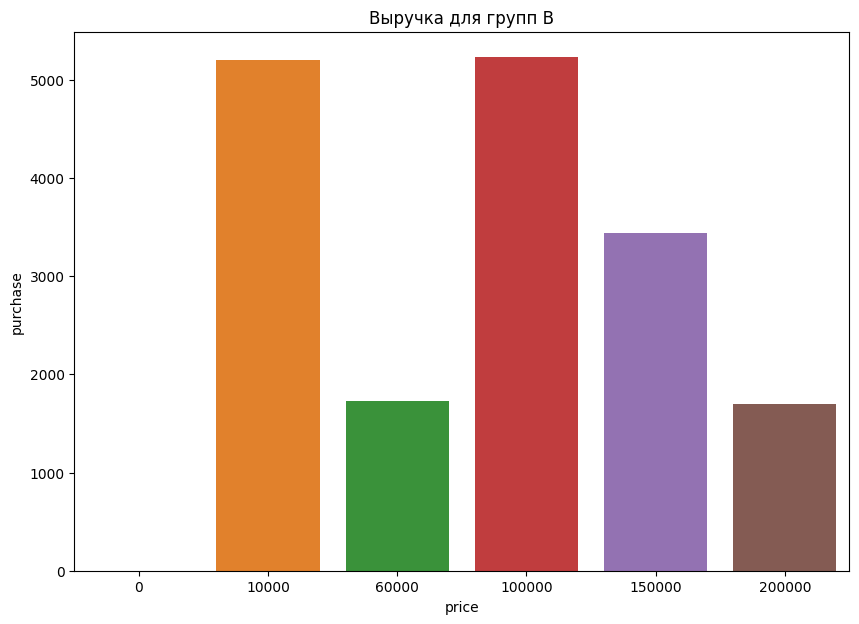

In [245]:
user_b = user_b[~user_b['user_id'].isin(result)]
price_group_b = user_b.groupby(['price']).agg({'user_id': 'count', 'purchase': 'sum'})

fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=price_group_b,
    x = price_group_b.index,
    y= 'purchase'
)
barplot.set_title('Выручка для групп B');

In [281]:
def cummulative_table(data): # В переменную data будем передавать название переменной датафейма
    df_cumm = [] # Создаём пустой список
    for i in data['date'].values: # Запускаем цикл по каждому отдельному значению даты
        out = data[data['date'] <= i].groupby('group')\
               .agg({'date':'max', 'user_id':'sum', 'purchase':'sum', 'price':'sum'})
        df_cumm.append(out) # Полученный срез добавляем в созданный ранее список
    return pd.concat(df_cumm).reset_index() # Объединяем списки и возвращаем результат

df_a = df_piv[df_piv['group'] == 'A']
df_b = df_piv[df_piv['group'] == 'B']

cumm_a = cummulative_table(df_a)
cumm_a['conversion'] = cumm_a['purchase'] / cumm_a['user_id'] * 100
cumm_a['avg_price'] = cumm_a['price'] / cumm_a['purchase']

cumm_b = cummulative_table(df_b)
cumm_b['conversion'] = cumm_b['purchase'] / cumm_b['user_id'] * 100
cumm_b['avg_price'] = cumm_b['price'] / cumm_b['purchase']



,date,group,user_id,price,purchase,conversion,avg_price
1,2021-01-02,B,2861,29660000,345,12.058721,85971.014493
3,2021-01-03,B,6619,65960000,754,11.391449,87480.106101
5,2021-01-04,B,6536,68030000,764,11.689106,89044.502618
7,2021-01-05,B,6511,63550000,749,11.503609,84846.461949
9,2021-01-06,B,6751,75020000,838,12.412976,89522.673031
11,2021-01-07,B,6616,67170000,767,11.593108,87574.967405
13,2021-01-08,B,6714,71270000,812,12.094132,87770.935961
15,2021-01-09,B,6628,71410000,784,11.828606,91084.183673
17,2021-01-10,B,6701,78080000,846,12.624981,92293.144208
19,2021-01-11,B,6679,66960000,770,11.528672,86961.038961


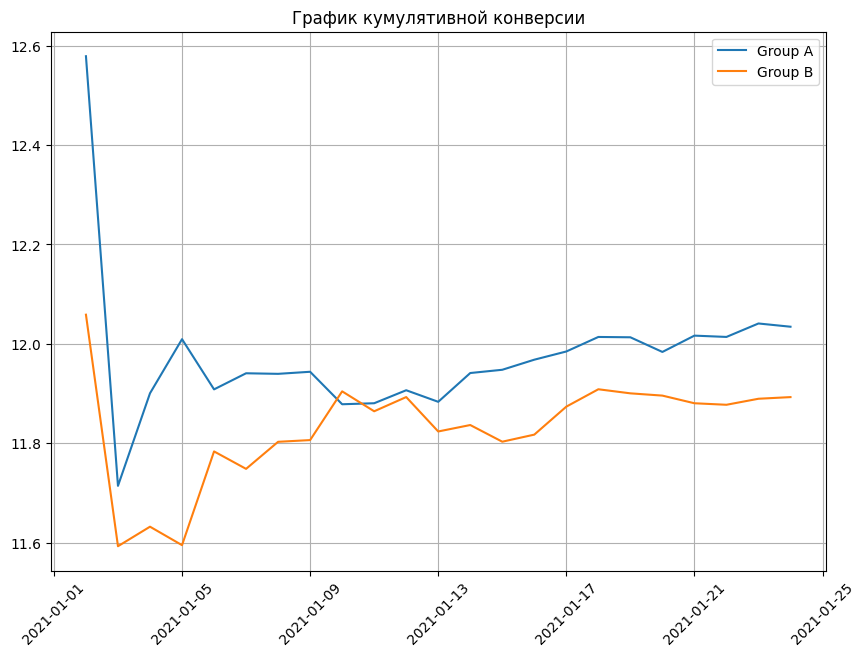

In [247]:
plt.figure(figsize=(10,7))
plt.plot(cumm_a['date'], cumm_a['conversion'], label='Group A')
plt.plot(cumm_b['date'], cumm_b['conversion'], label='Group B')
plt.title('График кумулятивной конверсии')
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.show()

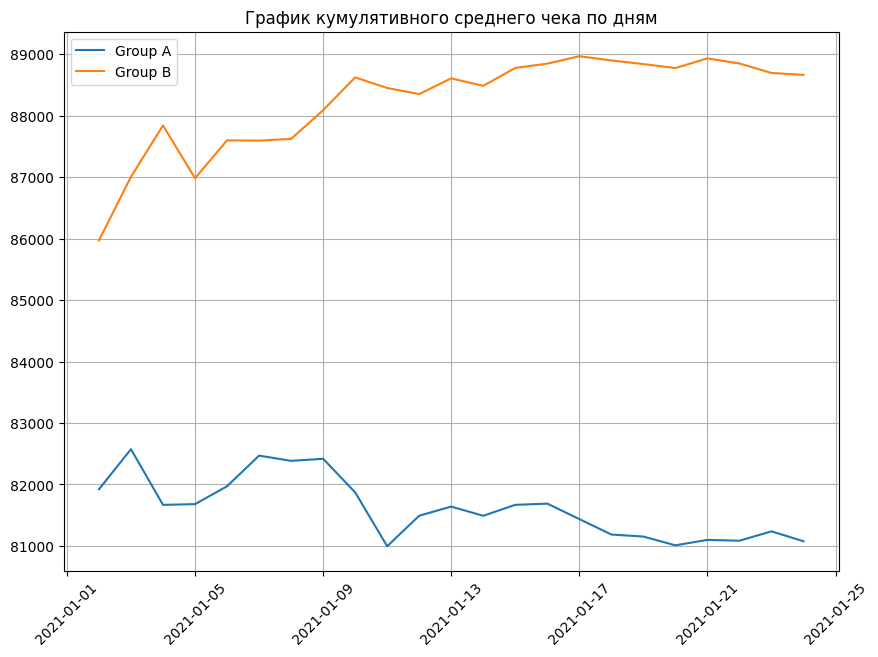

In [248]:
plt.figure(figsize=(10,7))
plt.plot(cumm_a['date'], cumm_a['avg_price'], label='Group A')
plt.plot(cumm_b['date'], cumm_b['avg_price'], label='Group B')
plt.title('График кумулятивного среднего чека по дням')
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.show()

<Axes: >

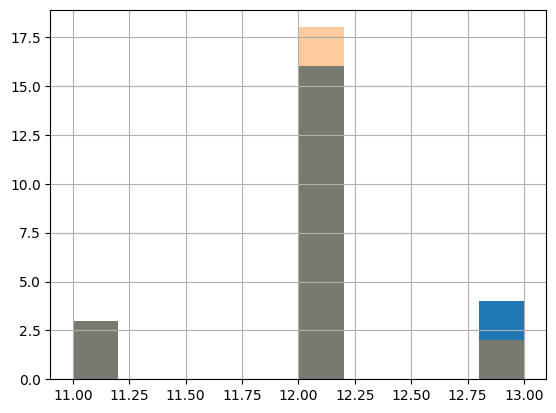

In [249]:
df_a['conversion'].round().hist()
df_b['conversion'].round().hist(alpha=0.4)

In [303]:
n1 = df_piv[df_piv['group'] == 'A']['user_id'].sum()
n2 = df_piv[df_piv['group'] == 'B']['user_id'].sum()

x1 = df_piv[df_piv['group'] == 'A']['purchase'].sum()
x2 = df_piv[df_piv['group'] == 'B']['purchase'].sum()

p1 = x1 / n1
p2 = x2 / n2

p = (x1 + x2) / (n1 + n2)
z = (p1 - p2)/ (math.sqrt(p*(1-p)*(1/n1 + 1/n2)))

alpha = 0.05

p_val = (1 - norm.cdf(abs(z))) * 2
print (p_val > alpha)

True


<Axes: >

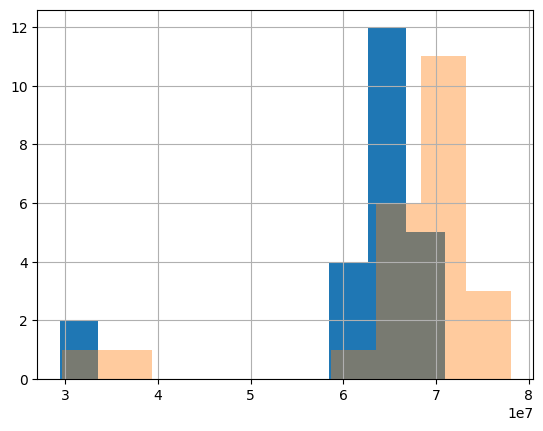

In [280]:
df_a['price'].hist()
df_b['price'].hist(alpha=0.4)

In [304]:
orders_value_a = df[(df['group'] == 'A')&(df['purchase'] > 0)]['price']
orders_value_b = df[(df['group'] == 'B')&(df['purchase'] > 0)]['price']

results = st.mannwhitneyu(orders_value_a, orders_value_b)
print(results.pvalue / 2 > alpha)


False


<Axes: >

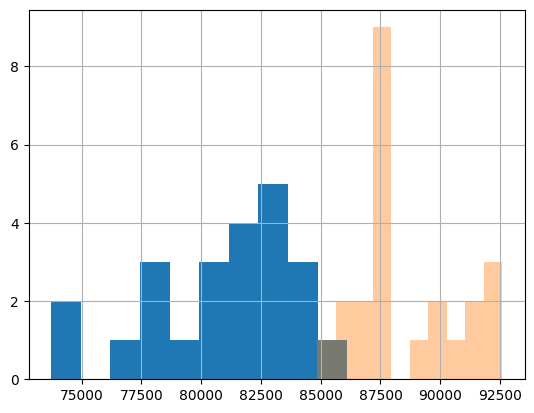

In [289]:
df_a['avg_price'].hist()
df_b['avg_price'].hist(alpha=0.4)

In [305]:
results = st.ttest_ind(df_a['avg_price'], df_b['avg_price'], equal_var = True)
print(results.pvalue)
print(results.pvalue > alpha)

2.25235893496179e-12
False
